In [1]:
import pandas as pd
import statsmodels.api as sm


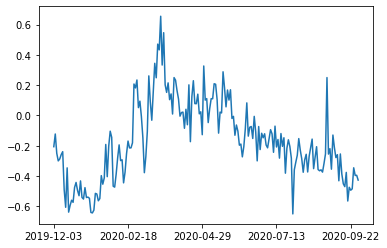

In [2]:
var=pd.read_csv(r'C:\Users\Hon Kim\Desktop\창종설\var.csv',encoding='cp949',index_col=0)
v1 = var.kousx.copy()
v1.name = 'v1'
v1 = v1 - var.외인순매수.values
fig = v1.plot()

In [3]:
var.head()

,kousx,gold,오존,아황산농도,평균기온,습도,뉴스빈도,총거래량,총거래대금,외인순매수,전체시총,ksvkospi,trend
2019-12-03,0.258065,0.032456,0.054795,0.333333,0.228571,0.066247,0.000257,0.064779,0.010620,0.463851,0.613463,0.025696,0.0
2019-12-04,0.298387,0.073816,0.123288,0.666667,0.267532,0.029793,0.000257,0.000000,0.031525,0.420594,0.598771,0.027645,0.0
2019-12-05,0.282258,0.057409,0.246575,0.666667,0.101299,0.011843,0.000086,0.080945,0.038392,0.531773,0.591106,0.030835,0.0
2019-12-06,0.270161,0.053857,0.109589,0.666667,0.062338,0.016654,0.000229,0.063021,0.010382,0.569601,0.612231,0.019493,0.0
2019-12-09,0.290323,0.039111,0.013699,0.666667,0.153247,0.073094,0.000086,0.033791,0.000000,0.577235,0.618708,0.014177,0.0


C:\Users\Hon Kim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


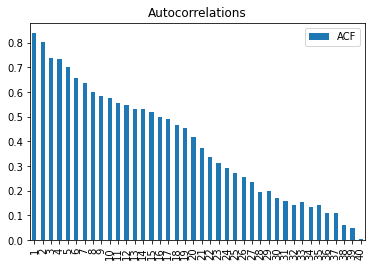

In [4]:
acf = pd.DataFrame(sm.tsa.stattools.acf(v1), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [5]:
from arch.unitroot import ADF

adf = ADF(v1)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.034
P-value                         0.272
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [7]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(0,len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

In [10]:
# define a dataset with a linear trend
v1 = var.kousx
print(v1)
# difference the dataset
diff = difference(v1)
# invert the difference
inverted = [inverse_difference(v1[i], diff[i]) for i in range(len(diff))]

2019-12-03    0.258065
2019-12-04    0.298387
2019-12-05    0.282258
2019-12-06    0.270161
2019-12-09    0.290323
                ...   
2020-09-23    0.052419
2020-09-24    0.145161
2020-09-25    0.129032
2020-09-28    0.141129
2020-09-29    0.104839
Name: kousx, Length: 206, dtype: float64


In [11]:
v1 = var.외인순매수
print(v1)
# difference the dataset
diff = difference(v1)
# invert the difference
inverted2 = [inverse_difference(v1[i], diff[i]) for i in range(len(diff))]

2019-12-03    0.463851
2019-12-04    0.420594
2019-12-05    0.531773
2019-12-06    0.569601
2019-12-09    0.577235
                ...   
2020-09-23    0.536149
2020-09-24    0.490144
2020-09-25    0.524614
2020-09-28    0.535437
2020-09-29    0.530891
Name: 외인순매수, Length: 206, dtype: float64


In [12]:
var['inverted_kousx'] = inverted
var['inverted_외인순매수'] = inverted2


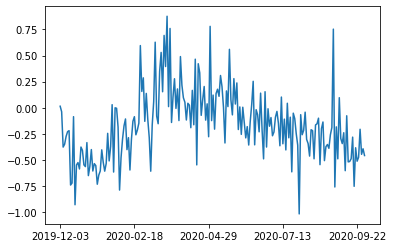

In [13]:
v1 = var.inverted_kousx.copy()
v1.name = 'v1'
v1 = v1 - var.inverted_외인순매수.values
fig = v1.plot()

C:\Users\Hon Kim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


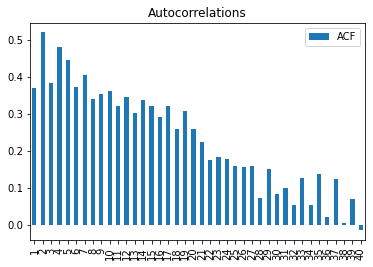

In [14]:
acf = pd.DataFrame(sm.tsa.stattools.acf(v1), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [15]:
from arch.unitroot import ADF

adf = ADF(v1)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.261
P-value                         0.185
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


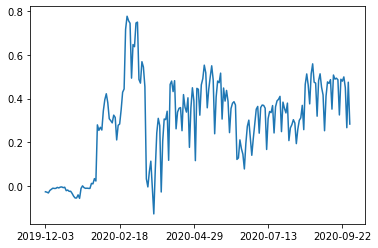

In [31]:
v2 = var.뉴스빈도.copy()
v2.name = 'v2'
v2 = v2 - var.ksvkospi.values
fig = v2.plot()

C:\Users\Hon Kim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


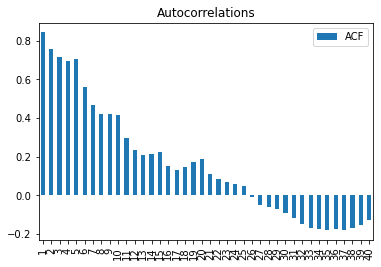

In [32]:
acf = pd.DataFrame(sm.tsa.stattools.acf(v2), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [34]:
adf = ADF(v2)
print(adf.summary().as_text())
adf.lags = 5
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.034
P-value                         0.032
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.278
P-value                         0.016
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


C:\Users\Hon Kim\anaconda3\lib\site-packages\arch\unitroot\unitroot.py:631: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)
